<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-2/blob/main/DSML_59_DZ_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ-2.Функция потерь и оптимизация


1. Импорт библиотек

In [2]:
import numpy as np                              # работа с массивами
import matplotlib.pyplot as plt                 # графики
from sklearn.datasets import load_iris          # датасет Iris
from sklearn.model_selection import train_test_split  # разделение на train/test
from sklearn.metrics import accuracy_score      # оценка точности
import time                                     # время выполнения


2. Загрузка и подготовка данных Iris

In [3]:
iris = load_iris()                              # загрузка Iris
X = iris.data[iris.target != 0]                 # оставил классы (target) 1 и 2 (т.е. мне нужно было убрать 0-ой класс)
y = iris.target[iris.target != 0] - 1           # я перекодировал метки в "0" и "1"

3. Разбивка на обучающую и тестовую выборки (в соотношении 80% на 20%)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
# закодировал набор цифрой "42" - как в обучающих вебинарах

4. Настройка параметров и весов (начальные значения я выбрал приравнять к нулю).

In [5]:
lr = 0.1                                        # скорость обучения
epochs = 3000                                   # число итераций
w0 = 0.0                                        #  w0 (смещение)
w1 = w2 = w3 = w4 = 0.0                         # веса w1..w4

5. Сигмоида (функция, не успеваю сделать класс как написано в задании со *)

In [6]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

6. Обучение модели методом градиентного спуска и запись значений logloss для текстового вывода и графика (разбил на 100 эпох - шаг для графика)

In [7]:
loss_history = [] # применил для хранения logloss
start_time = time.time() # использую для вычисления времени обучения

for epoch in range(1, epochs + 1):
    # z - Линейная комбинация признаков и весов
    z = (w0
         + w1 * X_train[:, 0]
         + w2 * X_train[:, 1]
         + w3 * X_train[:, 2]
         + w4 * X_train[:, 3])
    # Прогноз вероятностей
    a = sigmoid(z)
    # Градиенты
    dw0 = np.mean(a - y_train)
    dw1 = np.mean((a - y_train) * X_train[:, 0])
    dw2 = np.mean((a - y_train) * X_train[:, 1])
    dw3 = np.mean((a - y_train) * X_train[:, 2])
    dw4 = np.mean((a - y_train) * X_train[:, 3])
    # Обновление (пересчет на каждом шаге) параметров (с учетом "антиградиентов" со знаком "-")
    w0 -= lr * dw0
    w1 -= lr * dw1
    w2 -= lr * dw2
    w3 -= lr * dw3
    w4 -= lr * dw4
    # Сохраняю logloss каждые 100 эпох
    if epoch % 100 == 0:
        loss = - np.mean(y_train * np.log(a) + (1 - y_train) * np.log(1 - a))
        loss_history.append(loss)
        print(f"Epoch {epoch:4d} | loss = {loss:.4f}")

elapsed = time.time() - start_time
print(f"\nВремя на обучение моделли: {elapsed:.2f} sec")

Epoch  100 | loss = 0.4316
Epoch  200 | loss = 0.3253
Epoch  300 | loss = 0.2698
Epoch  400 | loss = 0.2356
Epoch  500 | loss = 0.2124
Epoch  600 | loss = 0.1954
Epoch  700 | loss = 0.1824
Epoch  800 | loss = 0.1721
Epoch  900 | loss = 0.1637
Epoch 1000 | loss = 0.1567
Epoch 1100 | loss = 0.1507
Epoch 1200 | loss = 0.1456
Epoch 1300 | loss = 0.1411
Epoch 1400 | loss = 0.1372
Epoch 1500 | loss = 0.1337
Epoch 1600 | loss = 0.1306
Epoch 1700 | loss = 0.1277
Epoch 1800 | loss = 0.1252
Epoch 1900 | loss = 0.1228
Epoch 2000 | loss = 0.1207
Epoch 2100 | loss = 0.1187
Epoch 2200 | loss = 0.1169
Epoch 2300 | loss = 0.1152
Epoch 2400 | loss = 0.1136
Epoch 2500 | loss = 0.1121
Epoch 2600 | loss = 0.1108
Epoch 2700 | loss = 0.1095
Epoch 2800 | loss = 0.1083
Epoch 2900 | loss = 0.1071
Epoch 3000 | loss = 0.1060

Время на обучение моделли: 0.18 sec


7. Тест точности модели - получил точность = 0.9

In [9]:
z_test = (w0
          + w1 * X_test[:, 0]
          + w2 * X_test[:, 1]
          + w3 * X_test[:, 2]
          + w4 * X_test[:, 3])
y_pred = (sigmoid(z_test) >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Тест точности модели: {accuracy:.4f}")

Тест точности модели: 0.9000


8. График Logloss (цель - увидеть на графике умньшение лог. потерь с адекватной задаче скоростью и кол-ву итераций (эпох)). Опытным путем выбрал скорость = 0.1 и 3000 эпох (число итераций)

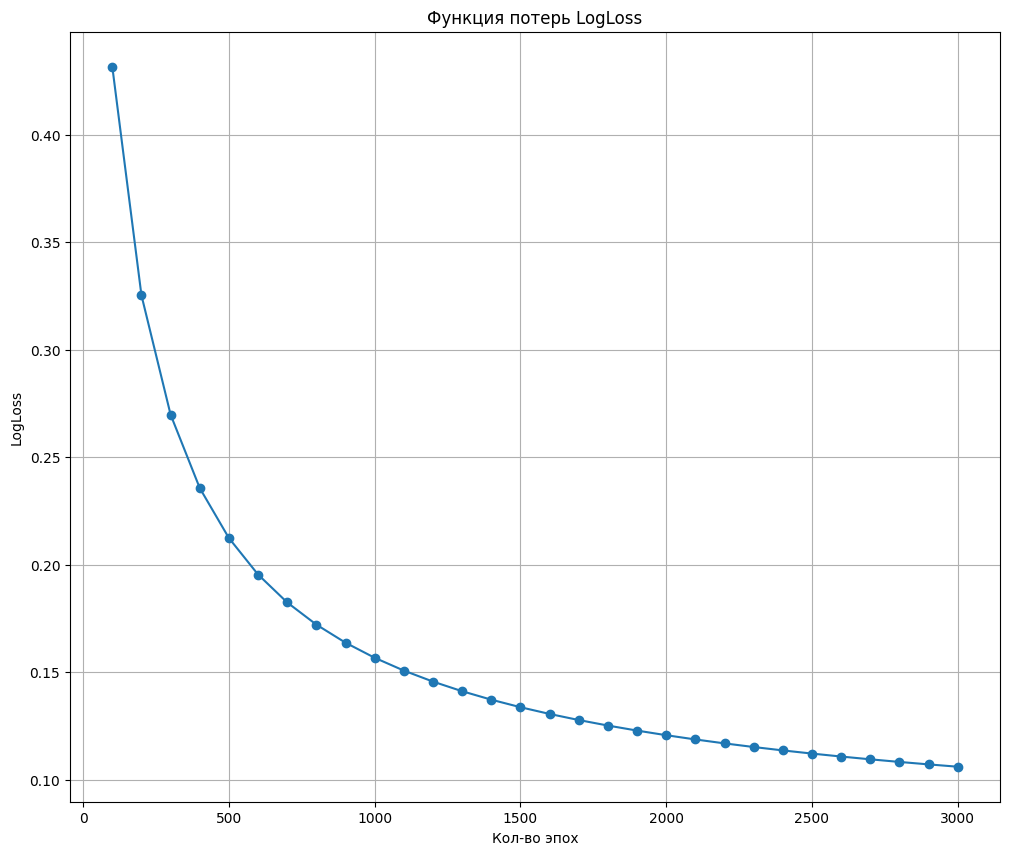

In [16]:
plt.figure(figsize=(12, 10))
epochs_plot = list(range(100, epochs + 1, 100))
plt.plot(epochs_plot, loss_history, marker='o')
plt.title('Функция потерь LogLoss')
plt.xlabel('Кол-во эпох')
plt.ylabel('LogLoss')
plt.grid(True)
plt.show()

9. Доп. визуализация: Длина лепестка петала (X3_test) в см :истинный класс и предсказанная моделью вероятность

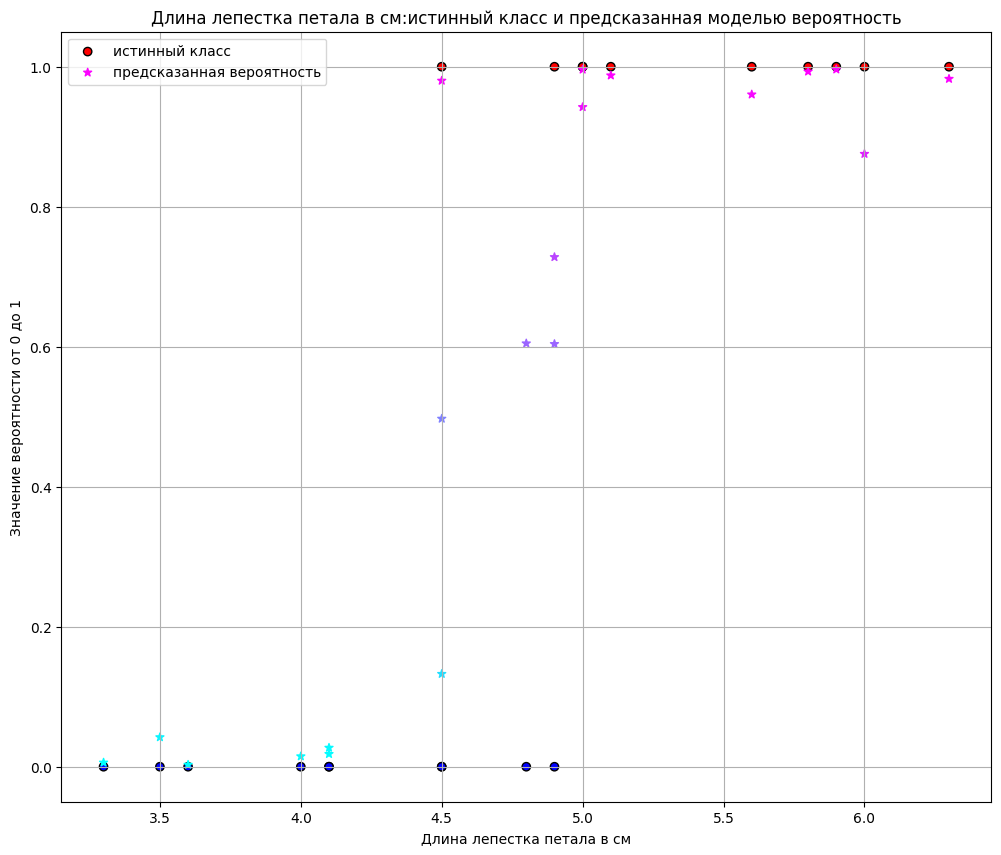

In [15]:
x3_test = X_test[:, 2]
probs   = sigmoid(w0
                 + w1 * X_test[:, 0]
                 + w2 * X_test[:, 1]
                 + w3 * x3_test
                 + w4 * X_test[:, 3])

plt.figure(figsize=(12, 10))
plt.scatter(x3_test, y_test, c=y_test, cmap='bwr', edgecolor='k', label='истинный класс')
plt.scatter(x3_test, probs,   c=probs, cmap='cool', marker='*', label='предсказанная вероятность')
plt.title('Длина лепестка петала в см:истинный класс и предсказанная моделью вероятность')
plt.xlabel('Длина лепестка петала в см')
plt.ylabel('Значение вероятности от 0 до 1')
plt.legend()
plt.grid(True)
plt.show()